In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras import Model
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
train_dir='/content/drive/MyDrive/Assignment 14/Train'
val_dir='/content/drive/MyDrive/Assignment 14/Val'

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(224,224),
    batch_size=32,
    label_mode='int'
)

Found 9 files belonging to 3 classes.


In [ ]:
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(224,224),
    batch_size=32,
    label_mode='int'
)

Found 9 files belonging to 3 classes.


In [ ]:
class_names=train_ds.class_names
num_classes=len(class_names)


In [ ]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [ ]:
preprocess_input=tf.keras.applications.resnet50.preprocess_input
def preprocess(image,label):
  return preprocess_input(image),label
train_ds=train_ds.map(preprocess)
val_ds=val_ds.map(preprocess)

In [ ]:
base_model=ResNet50(weights='imagenet',include_top=False,input_shape=(224,224,3))
base_model.trainable=False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
output=Dense(num_classes,activation='softmax')(x)
model=Model(inputs=base_model.input,outputs=output)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 20s 20s/step - accuracy: 0.4444 - loss: 1.1794 - val_accuracy: 0.5556 - val_loss: 1.2210
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.2126 - val_accuracy: 0.6667 - val_loss: 0.8621
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.0417 - val_accuracy: 0.7778 - val_loss: 0.5499
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.0085 - val_accuracy: 0.7778 - val_loss: 0.3728
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0027 - val_accuracy: 0.8889 - val_loss: 0.2651


In [ ]:
base_model.trainable=True
for layer in base_model.layers[:-50]:
    layer.trainable=False
model.compile(optimizer=Adam(learning_rate=1e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history2=model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 27s 27s/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 0.8889 - val_loss: 0.2581
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.0041 - val_accuracy: 1.0000 - val_loss: 0.2519
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.2469
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 1.0000 - val_loss: 0.2429
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 8.7202e-04 - val_accuracy: 1.0000 - val_loss: 0.2400


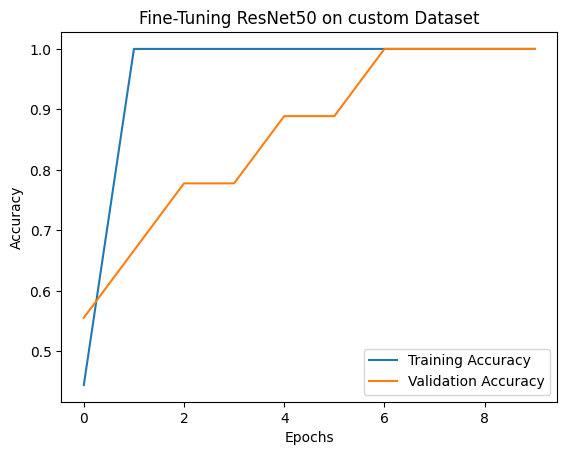

In [ ]:
acc=history1.history['accuracy']+history2.history['accuracy']
val_acc=history1.history['val_accuracy']+history2.history['val_accuracy']
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Fine-Tuning ResNet50 on custom Dataset')
plt.legend()
plt.show()

#assignment 15


In [ ]:
# step 1 import liabries
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Dropout
from tensorflow.keras import Model
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

In [ ]:
train_dir=('/content/drive/MyDrive/Assignment 14/Train')
val_dir=('/content/drive/MyDrive/Assignment 14/Val')

In [ ]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=(299,299),
    batch_size=32,
    label_mode='int'
)
val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=(299,299),
    batch_size=32,
    label_mode='int'
)

Found 9 files belonging to 3 classes.
Found 9 files belonging to 3 classes.


In [ ]:
class_names=train_ds.class_names
num_classes=len(class_names)

In [ ]:
AUTOTUNE=tf.data.AUTOTUNE
train_ds=train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds=val_ds.prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input
train_ds=train_ds.map(lambda x,y: (preprocess_input(x),y))
val_ds=val_ds.map(lambda x,y: (preprocess_input(x),y))

In [ ]:
base_model=InceptionV3(weights='imagenet',include_top=False,input_shape=(299,299,3))
base_model.trainable=False
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(128,activation='relu')(x)
output=Dense(num_classes,activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)


87910968/87910968 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history1=model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 19s 19s/step - accuracy: 0.2222 - loss: 1.0658 - val_accuracy: 0.7778 - val_loss: 0.7644
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 1.0000 - loss: 0.3861 - val_accuracy: 0.8889 - val_loss: 0.5706
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step - accuracy: 1.0000 - loss: 0.1342 - val_accuracy: 0.8889 - val_loss: 0.5078
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.0527 - val_accuracy: 0.8889 - val_loss: 0.5070
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.0230 - val_accuracy: 0.8889 - val_loss: 0.5188


In [ ]:
base_model.trainable=True
for layer in base_model.layers[:-50]:
    layer.trainable=False
model.compile(optimizer=Adam(learning_rate=1e-5),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history2=model.fit(train_ds,epochs=5,validation_data=val_ds)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 23s 23s/step - accuracy: 1.0000 - loss: 0.1903 - val_accuracy: 0.8889 - val_loss: 0.5129
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.1367 - val_accuracy: 0.8889 - val_loss: 0.5073
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.0999 - val_accuracy: 0.8889 - val_loss: 0.5022
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 1.0000 - loss: 0.0747 - val_accuracy: 0.8889 - val_loss: 0.4976
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 1.0000 - loss: 0.0572 - val_accuracy: 0.8889 - val_loss: 0.4933


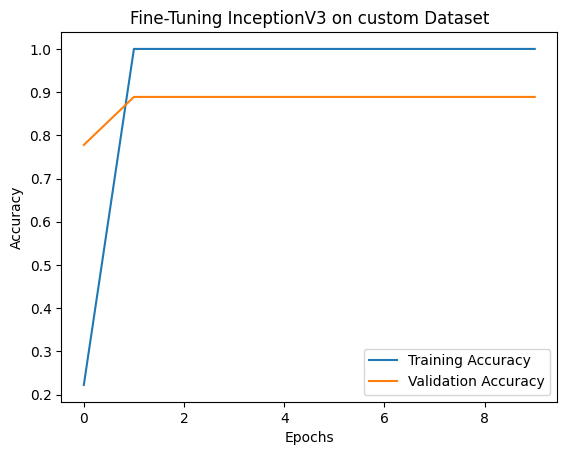

In [ ]:
acc=history1.history['accuracy']+history2.history['accuracy']
val_acc=history1.history['val_accuracy']+history2.history['val_accuracy']
plt.plot(acc,label='Training Accuracy')
plt.plot(val_acc,label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Fine-Tuning InceptionV3 on custom Dataset')
plt.legend()

## Assignment 16

In [1]:
# save and reload tained model and make predictions on new images
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import Model,layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()
x_train,x_test=x_train/255.0,x_test/255.0
y_train,y_test=to_categorical(y_train,10),to_categorical(y_test,10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [4]:
model=tf.keras.models.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(10,activation='softmax')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 69s 54ms/step - accuracy: 0.3285 - loss: 1.8116 - val_accuracy: 0.5289 - val_loss: 1.2968
Epoch 2/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 51ms/step - accuracy: 0.5514 - loss: 1.2512 - val_accuracy: 0.5985 - val_loss: 1.1242
Epoch 3/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 67s 54ms/step - accuracy: 0.6123 - loss: 1.0926 - val_accuracy: 0.6268 - val_loss: 1.0590
Epoch 4/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.6556 - loss: 0.9780 - val_accuracy: 0.6551 - val_loss: 0.9908
Epoch 5/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 51ms/step - accuracy: 0.6882 - loss: 0.8949 - val_accuracy: 0.6634 - val_loss: 0.9667
Epoch 6/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 80s 49ms/step - accuracy: 0.7087 - loss: 0.8294 - val_accuracy: 0.6729 - val_loss: 0.9302
Epoch 7/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 62s 49ms/step - accuracy: 0.7289 - loss: 0.7676 - val_accuracy: 0.6933 - val_loss: 0.8943
Epoch 8/10
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 63s 51ms/step - accuracy: 0.7424 -

In [6]:
model.save('cnn_model.h5')

In [7]:
from tensorflow.keras.models import load_model
loaded_model=load_model('cnn_model.h5')
loss,accuracy=loaded_model.evaluate(x_test,y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy:.2f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6993 - loss: 0.8635
Test Loss: 0.8700463175773621, Test Accuracy: 0.70


In [20]:
import numpy as np
from tensorflow.keras.preprocessing import image
img=image.load_img('/content/sample6.jpg',target_size=(32,32))
img_array=image.img_to_array(img)
img_array=np.expand_dims(img_array,axis=0)
img_array=img_array/255.0

In [21]:
prediction=loaded_model.predict(img_array)
class_idx=np.argmax(prediction)
class_names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
print(f"predicted class:{class_names[class_idx]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
predicted class:frog
